In [1]:
from util import *
from seq2seq import *

In [2]:
# load data
train_x = open('data/train_x.txt').read().splitlines()
train_y = open('data/train_y.txt').read().splitlines()
test_x = open('data/test_x.txt').read().splitlines()
test_y = open('data/test_y.txt').read().splitlines()

In [3]:
# Instantiation
data = Data()
data.set_train(train_x, train_y)
data.set_test(test_x, test_y)
encoder = Encoder(data)
decoder = Decoder(data)
seq2seq = Seq2Seq(encoder, decoder)

# build model
seq2seq.build(show_model=False, opt='rmsprop', loss='categorical_crossentropy')


Epoch 1/30


2022-06-21 23:03:21.881608: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


26/26 [==============================] - 9s 203ms/step - loss: 1.0698 - accuracy: 0.2580 - val_loss: 0.9331 - val_accuracy: 0.3554
Epoch 2/30
26/26 [==============================] - 6s 220ms/step - loss: 0.8115 - accuracy: 0.4302 - val_loss: 0.7590 - val_accuracy: 0.4429
Epoch 3/30
26/26 [==============================] - 6s 227ms/step - loss: 0.6898 - accuracy: 0.4772 - val_loss: 0.6596 - val_accuracy: 0.5009
Epoch 4/30
26/26 [==============================] - 6s 246ms/step - loss: 0.6134 - accuracy: 0.5260 - val_loss: 0.5837 - val_accuracy: 0.5487
Epoch 5/30
26/26 [==============================] - 7s 278ms/step - loss: 0.5391 - accuracy: 0.5834 - val_loss: 0.5421 - val_accuracy: 0.5714
Epoch 6/30
26/26 [==============================] - 7s 272ms/step - loss: 0.4865 - accuracy: 0.6236 - val_loss: 0.4636 - val_accuracy: 0.6573
Epoch 7/30
26/26 [==============================] - 7s 271ms/step - loss: 0.4271 - accuracy: 0.6693 - val_loss: 0.4119 - val_accuracy: 0.6959
Epoch 8/30
26/26 

<AxesSubplot:xlabel='Epoch'>

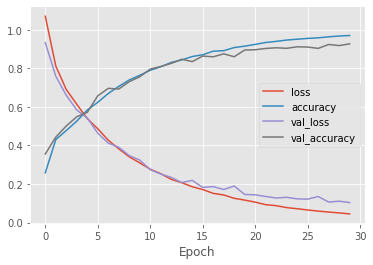

In [4]:
# train
seq2seq.train(batch_size=100, epoch=30, dev_split=0.2)

In [5]:
pred = seq2seq.predict(join_by='')

100%|██████████| 810/810 [03:23<00:00,  3.98it/s]


In [7]:
df = pd.DataFrame({'thai':test_x,'pred':pred, 'answer':test_y})

In [10]:
df.to_csv('pred.csv', index=False)

In [12]:
from keras import layers

In [13]:
layers.Dot

keras.layers.merging.dot.Dot

In [18]:
a = np.zeros([10,6,3])
b = np.zeros([10,6,3])
c = keras.layers.Dot(axes=[2,2])

In [20]:
c([a,b]).shape

TensorShape([10, 6, 6])